In [1]:
import pandas as pd
import matplotlib.pyplot as plt


$$W_{country}= \frac{S018 \times Population_{country}}{1000}$$


**Q196** Government has the right: Keep people under video surveillance in public areas (WVS - 7)

Do you think this country’s government should or should not have the right to do the
following: Keep people under video surveillance in public areas  
1.- Definitely should have the right  
2.- Probably should have the right  
3.- Probably should not have the right   
4.- Definitely should not have the right   
-1-.- Don ́t know  
-2-.- No answer  
-4-.- Not asked  
-5-.- Missing; Not available  

In [53]:
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_Q196 = data[['B_COUNTRY_ALPHA','Q196']]
country_Q196 = country_Q196[country_Q196.Q196 > 0]
print(country_Q196.head())
country_Q196.Q196 = country_Q196.Q196.apply(lambda x: 1 if x == 1 else 0)
print(country_Q196.head())

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1407/3551094594.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


  B_COUNTRY_ALPHA  Q196
0             AND     2
1             AND     1
2             AND     4
3             AND     2
4             AND     1
  B_COUNTRY_ALPHA  Q196
0             AND     0
1             AND     1
2             AND     0
3             AND     0
4             AND     1


In [48]:
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_S018 = data[['B_COUNTRY_ALPHA','S018']]
weights_country = country_S018.groupby('B_COUNTRY_ALPHA')['S018'].max().reset_index()

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1407/2372797264.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


In [51]:
country_S018[country_S018.B_COUNTRY_ALPHA == 'URY']

,B_COUNTRY_ALPHA,S018
91641,URY,1.0
91642,URY,1.0
91643,URY,1.0
91644,URY,1.0
91645,URY,1.0
...,...,...
92636,URY,1.0
92637,URY,1.0
92638,URY,1.0
92639,URY,1.0


In [54]:
country_Q196.groupby('B_COUNTRY_ALPHA').value_counts()

B_COUNTRY_ALPHA  Q196
AND              0        654
                 1        349
ARG              0        771
                 1        181
ARM              0        968
                         ... 
VEN              1        262
VNM              0       1025
                 1        175
ZWE              0        948
                 1        254
Length: 126, dtype: int64

In [55]:
country_Q196 = country_Q196.groupby('B_COUNTRY_ALPHA')['Q196'].mean().reset_index()

In [56]:
weights_country

,B_COUNTRY_ALPHA,S018
0,AND,0.996016
1,ARG,0.997009
2,ARM,0.817662
3,AUS,0.551572
4,BGD,0.833333
...,...,...
59,URY,1.000000
60,USA,0.385208
61,VEN,0.840336
62,VNM,0.833333


In [57]:
country_Q196

,B_COUNTRY_ALPHA,Q196
0,AND,0.347956
1,ARG,0.190126
2,ARM,0.185870
3,AUS,0.410784
4,BGD,0.617438
...,...,...
58,URY,0.311728
59,USA,0.221012
60,VEN,0.220168
61,VNM,0.145833


In [58]:
merged_df = weights_country.merge(country_Q196,how = 'outer', on = 'B_COUNTRY_ALPHA')
merged_df['final_q196'] = merged_df['Q196'] * merged_df['S018']
merged_df

,B_COUNTRY_ALPHA,S018,Q196,final_q196
0,AND,0.996016,0.347956,0.346570
1,ARG,0.997009,0.190126,0.189557
2,ARM,0.817662,0.185870,0.151979
3,AUS,0.551572,0.410784,0.226577
4,BGD,0.833333,0.617438,0.514531
...,...,...,...,...
59,URY,1.000000,0.311728,0.311728
60,USA,0.385208,0.221012,0.085135
61,VEN,0.840336,0.220168,0.185015
62,VNM,0.833333,0.145833,0.121528


In [59]:
merged_df.drop(columns=['S018','Q196'],inplace=True)

In [60]:
individual_collective = pd.read_csv('6-dimensions-for-website-2015-08-16.csv',sep=';', na_values='#NULL!')

In [61]:
individual_collective['normalized_idv'] = 1 - (individual_collective['idv'] - individual_collective['idv'].min()) / (individual_collective['idv'].max() - individual_collective['idv'].min())


In [62]:
individual_collective.drop(columns=['country',	'pdi',	'idv',	'mas',	'uai',	'ltowvs','ivr'],inplace=True)
individual_collective = individual_collective[~individual_collective.normalized_idv.isna()]
individual_collective

,ctr,normalized_idv
0,AFE,0.752941
1,AFW,0.835294
5,ARA,0.623529
6,ARG,0.529412
8,AUL,0.011765
...,...,...
102,TUR,0.635294
103,USA,0.000000
106,URU,0.647059
107,VEN,0.929412


In [63]:
individual_collective.rename(columns={'ctr': 'B_COUNTRY_ALPHA'}, inplace=True)
individual_collective

,B_COUNTRY_ALPHA,normalized_idv
0,AFE,0.752941
1,AFW,0.835294
5,ARA,0.623529
6,ARG,0.529412
8,AUL,0.011765
...,...,...
102,TUR,0.635294
103,USA,0.000000
106,URU,0.647059
107,VEN,0.929412


In [64]:
merged_df = merged_df.merge(individual_collective,how = 'outer',on='B_COUNTRY_ALPHA')
merged_df

,B_COUNTRY_ALPHA,final_q196,normalized_idv
0,AND,0.346570,NaN
1,ARG,0.189557,0.529412
2,ARM,0.151979,NaN
3,AUS,0.226577,NaN
4,BGD,0.514531,NaN
...,...,...,...
119,SWG,NaN,0.258824
120,TAI,NaN,0.870588
121,TRI,NaN,0.882353
122,URU,NaN,0.647059


In [65]:
merged_df = merged_df[~merged_df.final_q196.isna()]
merged_df = merged_df[~merged_df.normalized_idv.isna()]
merged_df

,B_COUNTRY_ALPHA,final_q196,normalized_idv
1,ARG,0.189557,0.529412
6,BRA,0.196468,0.623529
7,CAN,0.035183,0.129412
8,CHL,0.211180,0.800000
10,COL,0.194339,0.917647
12,CZE,0.106458,0.388235
17,GBR,0.107702,0.023529
25,JPN,0.094803,0.529412
29,KOR,0.051612,0.858824
35,MEX,0.150055,0.717647


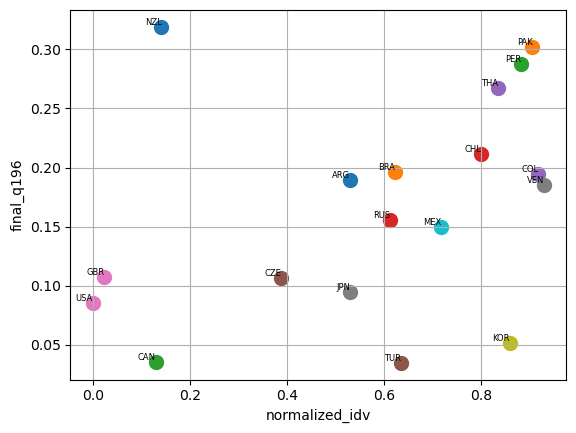

In [66]:

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['normalized_idv'], row['final_q196'], label=row['B_COUNTRY_ALPHA'],s = 100)
    plt.text(row['normalized_idv'], row['final_q196'], row['B_COUNTRY_ALPHA'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('normalized_idv')
plt.ylabel('final_q196')



# Show the plot
plt.grid()

In [68]:

data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_Q197 = data[['B_COUNTRY_ALPHA','Q197']]
country_Q197 = country_Q197[country_Q197.Q197 > 0]
print(country_Q197.head())
country_Q197.Q197 = country_Q197.Q197.apply(lambda x: 1 if x == 1 else 0)
print(country_Q197.head())

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1407/2853530746.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


  B_COUNTRY_ALPHA  Q197
0             AND     4
1             AND     4
2             AND     4
3             AND     4
4             AND     4
  B_COUNTRY_ALPHA  Q197
0             AND     0
1             AND     0
2             AND     0
3             AND     0
4             AND     0


In [69]:
country_Q197.groupby('B_COUNTRY_ALPHA').value_counts()

B_COUNTRY_ALPHA  Q197
AND              0        967
                 1         37
ARG              0        888
                 1         71
ARM              0       1006
                         ... 
VEN              1         61
VNM              0       1151
                 1         49
ZWE              0       1019
                 1        180
Length: 126, dtype: int64

In [70]:
country_Q197 = country_Q197.groupby('B_COUNTRY_ALPHA')['Q197'].mean().reset_index()
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_S018 = data[['B_COUNTRY_ALPHA','S018']]
weights_country = country_S018.groupby('B_COUNTRY_ALPHA')['S018'].max().reset_index()

merged_df = weights_country.merge(country_Q197,how = 'outer', on = 'B_COUNTRY_ALPHA')
merged_df['final_q197'] = merged_df['Q197'] * merged_df['S018']
merged_df


/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1407/716661506.py:2: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


,B_COUNTRY_ALPHA,S018,Q197,final_q197
0,AND,0.996016,0.036853,0.036706
1,ARG,0.997009,0.074035,0.073814
2,ARM,0.817662,0.128250,0.104865
3,AUS,0.551572,0.075851,0.041837
4,BGD,0.833333,0.247544,0.206287
...,...,...,...,...
59,URY,1.000000,0.080164,0.080164
60,USA,0.385208,0.045010,0.017338
61,VEN,0.840336,0.051261,0.043076
62,VNM,0.833333,0.040833,0.034028


In [71]:
merged_df.drop(columns='Q197',inplace=True)

In [73]:
merged_df = merged_df.merge(individual_collective,how ='outer',on='B_COUNTRY_ALPHA')
merged_df

,B_COUNTRY_ALPHA,S018,final_q197,normalized_idv
0,AND,0.996016,0.036706,NaN
1,ARG,0.997009,0.073814,0.529412
2,ARM,0.817662,0.104865,NaN
3,AUS,0.551572,0.041837,NaN
4,BGD,0.833333,0.206287,NaN
...,...,...,...,...
119,SWG,NaN,NaN,0.258824
120,TAI,NaN,NaN,0.870588
121,TRI,NaN,NaN,0.882353
122,URU,NaN,NaN,0.647059


In [74]:
merged_df.drop(columns='S018',inplace=True)
merged_df = merged_df[~merged_df.final_q197.isna()]
merged_df = merged_df[~merged_df.normalized_idv.isna()]
merged_df

,B_COUNTRY_ALPHA,final_q197,normalized_idv
1,ARG,0.073814,0.529412
6,BRA,0.060146,0.623529
7,CAN,0.010282,0.129412
8,CHL,0.050883,0.800000
10,COL,0.081371,0.917647
12,CZE,0.028249,0.388235
17,GBR,0.021052,0.023529
25,JPN,0.025890,0.529412
29,KOR,0.018709,0.858824
35,MEX,0.052790,0.717647


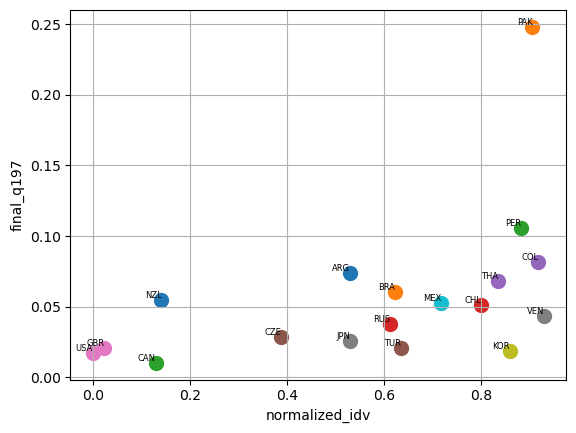

In [75]:

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['normalized_idv'], row['final_q197'], label=row['B_COUNTRY_ALPHA'],s = 100)
    plt.text(row['normalized_idv'], row['final_q197'], row['B_COUNTRY_ALPHA'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('normalized_idv')
plt.ylabel('final_q197')



# Show the plot
plt.grid()

In [80]:
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_Q30 = data[['B_COUNTRY_ALPHA','Q30']]
country_Q30 = country_Q30[country_Q30.Q30 > 0]
print(country_Q30.head())
country_Q30.Q30 = country_Q30.Q30.apply(lambda x: 1 if x == 1 else 0)
print(country_Q30.head())

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1407/651068867.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


  B_COUNTRY_ALPHA  Q30
0             AND    3
1             AND    3
2             AND    3
3             AND    4
4             AND    3
  B_COUNTRY_ALPHA  Q30
0             AND    0
1             AND    0
2             AND    0
3             AND    0
4             AND    0


In [82]:
country_Q30 = country_Q30.groupby('B_COUNTRY_ALPHA')['Q30'].mean().reset_index()
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_S018 = data[['B_COUNTRY_ALPHA','S018']]
weights_country = country_S018.groupby('B_COUNTRY_ALPHA')['S018'].max().reset_index()

merged_df = weights_country.merge(country_Q30,how = 'outer', on = 'B_COUNTRY_ALPHA')
merged_df['final_q30'] = merged_df['Q30'] * merged_df['S018']
merged_df

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1407/1665682548.py:2: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


,B_COUNTRY_ALPHA,S018,Q30,final_q30
0,AND,0.996016,0.006993,0.006965
1,ARG,0.997009,0.043788,0.043657
2,ARM,0.817662,0.062449,0.051062
3,AUS,0.551572,0.009465,0.005221
4,BGD,0.833333,0.189446,0.157872
...,...,...,...,...
59,URY,1.000000,0.009615,0.009615
60,USA,0.385208,0.020495,0.007895
61,VEN,0.840336,0.057143,0.048019
62,VNM,0.833333,0.035000,0.029167


In [83]:
merged_df.drop(columns='Q30',inplace=True)
merged_df = merged_df.merge(individual_collective,how ='outer',on='B_COUNTRY_ALPHA')
merged_df.drop(columns='S018',inplace=True)
merged_df = merged_df[~merged_df.final_q30.isna()]
merged_df = merged_df[~merged_df.normalized_idv.isna()]


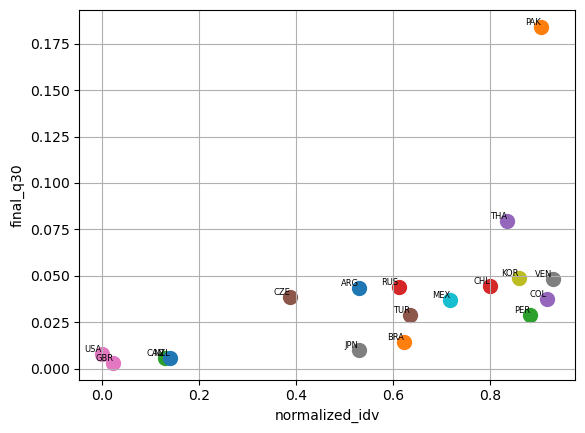

In [84]:

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['normalized_idv'], row['final_q30'], label=row['B_COUNTRY_ALPHA'],s = 100)
    plt.text(row['normalized_idv'], row['final_q30'], row['B_COUNTRY_ALPHA'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('normalized_idv')
plt.ylabel('final_q30')



# Show the plot
plt.grid()


Numeric variable [makes the sample size of all countries equal to the same amount of N=1000]. Equilibrated weights have been calculated using the formula: 1.000/sample size. Equilibrated weight can be used when all countries and territories involved in the analysis are required to be treated as equal units, regardless of their population or sample size. The weights to be used are the product of the W_WEIGHT and S018.

In [85]:
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_weight = data[['B_COUNTRY_ALPHA','W_WEIGHT']]

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1407/3822935791.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


,B_COUNTRY_ALPHA,W_WEIGHT
0,AND,1.000000
1,AND,1.000000
2,AND,1.000000
3,AND,1.000000
4,AND,1.000000
...,...,...
94273,NIR,4.000927
94274,NIR,4.647936
94275,NIR,4.848000
94276,NIR,4.848000
